## Chapter 5 时间数据可视化

### 5.2 数据的关联性

#### 5.2.1 散点图

散点图不仅可以用于表示时间数据，还可以用于表示两个变量之间的关系。横轴、纵轴分别是这两个变量的值，便于我们推断变量间的相关性。

> 如果变量之间不存在相互关系，那么在散点图上就会表现为随机分布的离散的点；如果变量之间存在某种相关性，那么大部分的数据点就会相对密集并呈现出某种趋势。

**ggplot**模块，类似于R语言中的ggplot2。


In [2]:
import ggplot as gp

AttributeError: module 'pandas' has no attribute 'tslib'

In [3]:
import ggplot as gp

ModuleNotFoundError: No module named 'pandas.lib'

可以看到报错了`AttributeError: module 'pandas' has no attribute 'tslib'`,`ModuleNotFoundError: No module named 'pandas.lib'` 这是因为ggplot已经很久没有维护了。

在[@嗯嗲和滴](https://blog.csdn.net/qq_38889342)的[博文](https://blog.csdn.net/qq_38889342/article/details/89355727)中给出了解决方案：去ggplot的安装地修改代码。

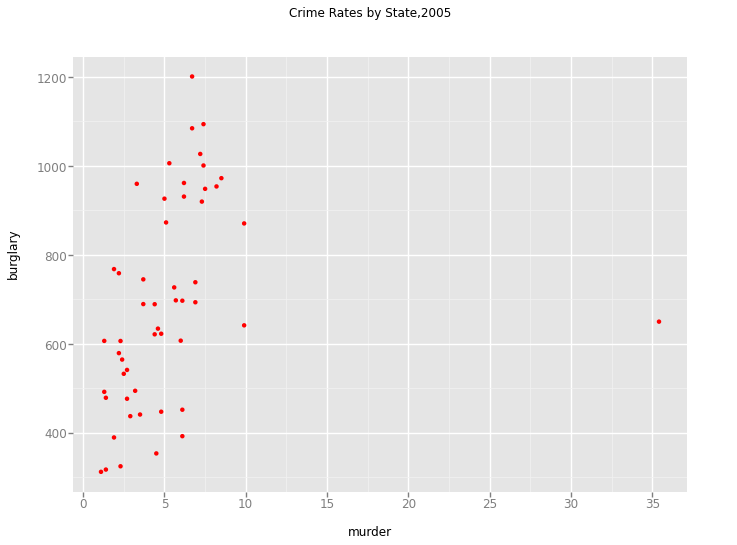

<ggplot: (8734903117183)>


In [2]:
import ggplot as gp
import pandas as pd
import numpy as np

crime = pd.read_csv('./data/crimeRatesByState2005.csv')
print(gp.ggplot(gp.aes(x='murder', y='burglary'), data=crime)+gp.geom_point(color='red')+gp.ggtitle(u'Crime Rates by State,2005')) #+连接多个配置，设置为红色


> 有一个异常点，需要优化。

<ipython-input-10-6529b814aa7c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime2 = crime2[crime.state != 'District of Columbia']


AttributeError: 'DataFrame' object has no attribute 'sort'

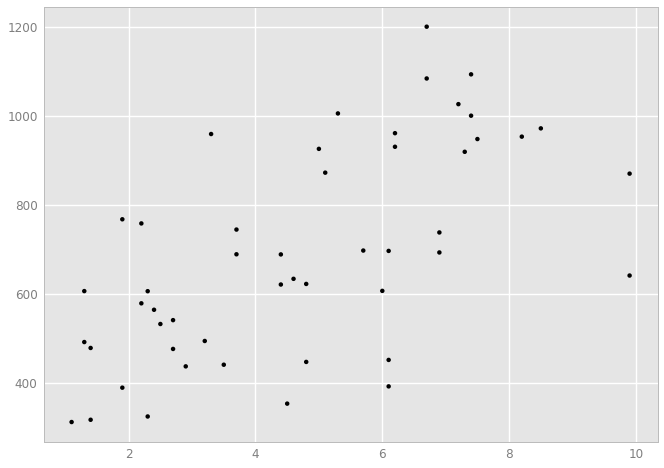

In [10]:
# 去除全美平均值和华盛顿特区两个数据点
crime2 = crime[crime.state != 'United States']
crime2 = crime2[crime.state != 'District of Columbia']

print(gp.ggplot(gp.aes(x='murder', y='burglary'), data=crime2)+gp.geom_point()+gp.stat_smooth(method='loess', color='red'))

又出现了报错`'DataFrame' object has no attribute 'sort'`。

[@younero](https://github.com/younero)给出了[解决方案](https://github.com/younero/data_visualization/blob/master/chapter5/5.2.1/%E7%AC%AC%E4%BA%8C%E4%B8%AA%E4%BB%A3%E7%A0%81%E6%8A%A5%E9%94%99%E7%9A%84%E8%A7%A3%E5%86%B3%E6%96%B9%E6%B3%95.pdf):修改stat_smooth.py.

这一步在去除异常点，增强关联分析可视化效果的同时，增加了拟合平滑曲线`gp.stat_smooth(method='loess', color='red')`


从图中可以看出，各个地区的谋杀案和入室盗窃案两组数据之间基本呈现的是正相关关系。**使用拟合曲线让这个相关关系更为直观。**

由于`ggplot`库已“年久失修”，这里同时给出使用`matplotlib`库的解决方案：


<ipython-input-4-8938d44d9224>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime2 = crime2[crime.state != 'District of Columbia']


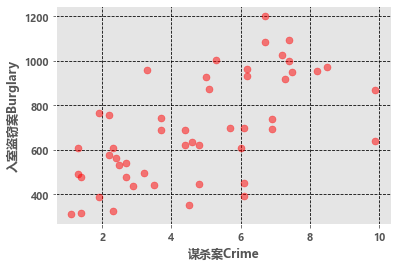

In [4]:
import pandas as pd
import matplotlib.pyplot as plt # 不用年久失修的库

crime = pd.read_csv('./data/crimeRatesByState2005.csv')
crime2 = crime[crime.state != 'United States']
crime2 = crime2[crime.state != 'District of Columbia']
data_x = list(crime2['murder'])
data_y = list(crime2['burglary'])

plt.scatter(data_x, data_y, s=50, c='r', marker='o', alpha=0.5)

plt.grid(ls='--',c='black') # 添加参考线

# 设置x，y轴标签
font = {
    "family":"Microsoft YaHei"
}  # 设置字体
plt.xlabel('谋杀案Crime', font)
plt.ylabel('入室盗窃案Burglary', font)

plt.show()


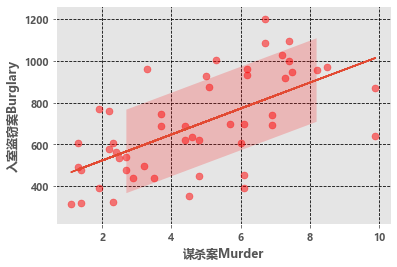

In [5]:
x = list(crime2['murder'])
y = list(crime2['burglary'])

plt.figure()  # 创建一个图像

plt.scatter(x, y, s=50, c='r', marker='o', alpha=0.5)

poly = np.polyfit(x, y, deg=1)# 绘制拟合曲线
py = np.polyval(poly, x)
py1 = py + 200
py2 = py - 200
plt.plot(x, py)
plt.plot(x, py1, alpha=0)
plt.plot(x, py2, alpha=0)
plt.fill_between(x, py1, py2, where=py1>py2, facecolor='red', alpha=0.2)

plt.grid(ls='--',c='black') # 添加参考线

# 设置x，y轴标签
font = {
    "family":"Microsoft YaHei"
}  # 设置字体
plt.xlabel('谋杀案Murder')
plt.ylabel('入室盗窃案Burglary')

plt.show()

#### 5.2.2 散点图矩阵

很多时候，变量不止两个，因此，应当同时考察多个变量间的相关关系；但是若一一对每两组绘制简单散点图则过于繁琐。

此时就可以利用**散点图矩阵**来同时绘制多个变量间的散点图，这样就可以快速发现哪两个变量之间的相关性更高。

散点图矩阵通常是方格网布局，在这个方格网中，水平和垂直的方向上都有多个变量，左上角到右下角的对角线空出来的部分可以加入密度曲线直方图。

这里我们使用`matplotlib`、`seaborn`库来绘制。

<ipython-input-16-012f9caaf7eb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime2 = crime2[crime.state != 'District of Columbia']


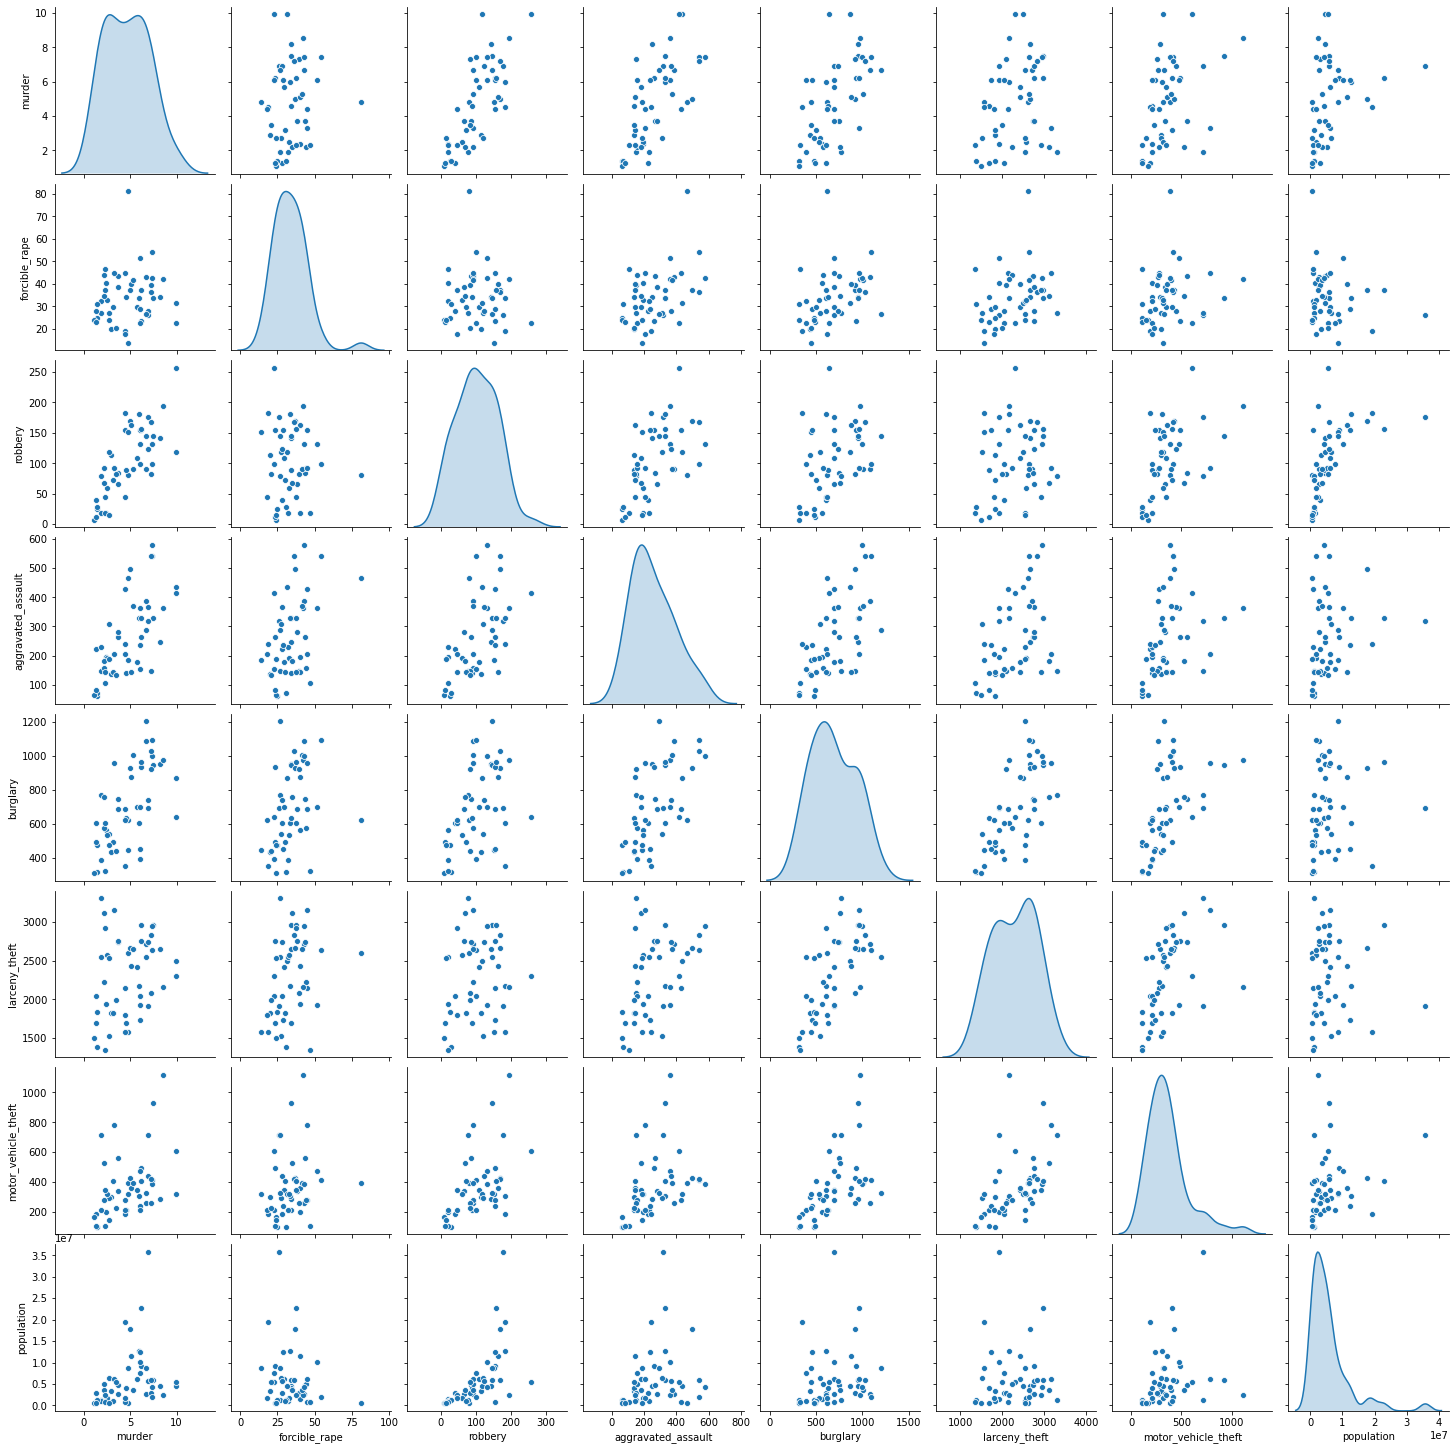

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #可以理解为matplotlib的扩展包

crime = pd.read_csv('./data/crimeRatesByState2005.csv')

crime2 = crime[crime.state != 'United States']
crime2 = crime2[crime.state != 'District of Columbia']

crime2 = crime2.drop({'state'}, axis=1)
q = sns.pairplot(crime2, diag_kind='kde')# kde：对角线图表用KDE方法绘制（统计学）

plt.show()

该图展示了七种类型的犯罪率之间的关系，其中有很多是正相关的，例如故意伤害（aggravated_assault）和偷窃（larceny_theft）的关联性较高，呈正相关。但是偷窃和谋杀案之间的联系就不是很明显，此时不能轻易地做出假设。

若创建带有拟合曲线的散点图矩阵，会更方便读者的观察:

<ipython-input-17-515d73778948>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime2 = crime2[crime.state != 'District of Columbia']


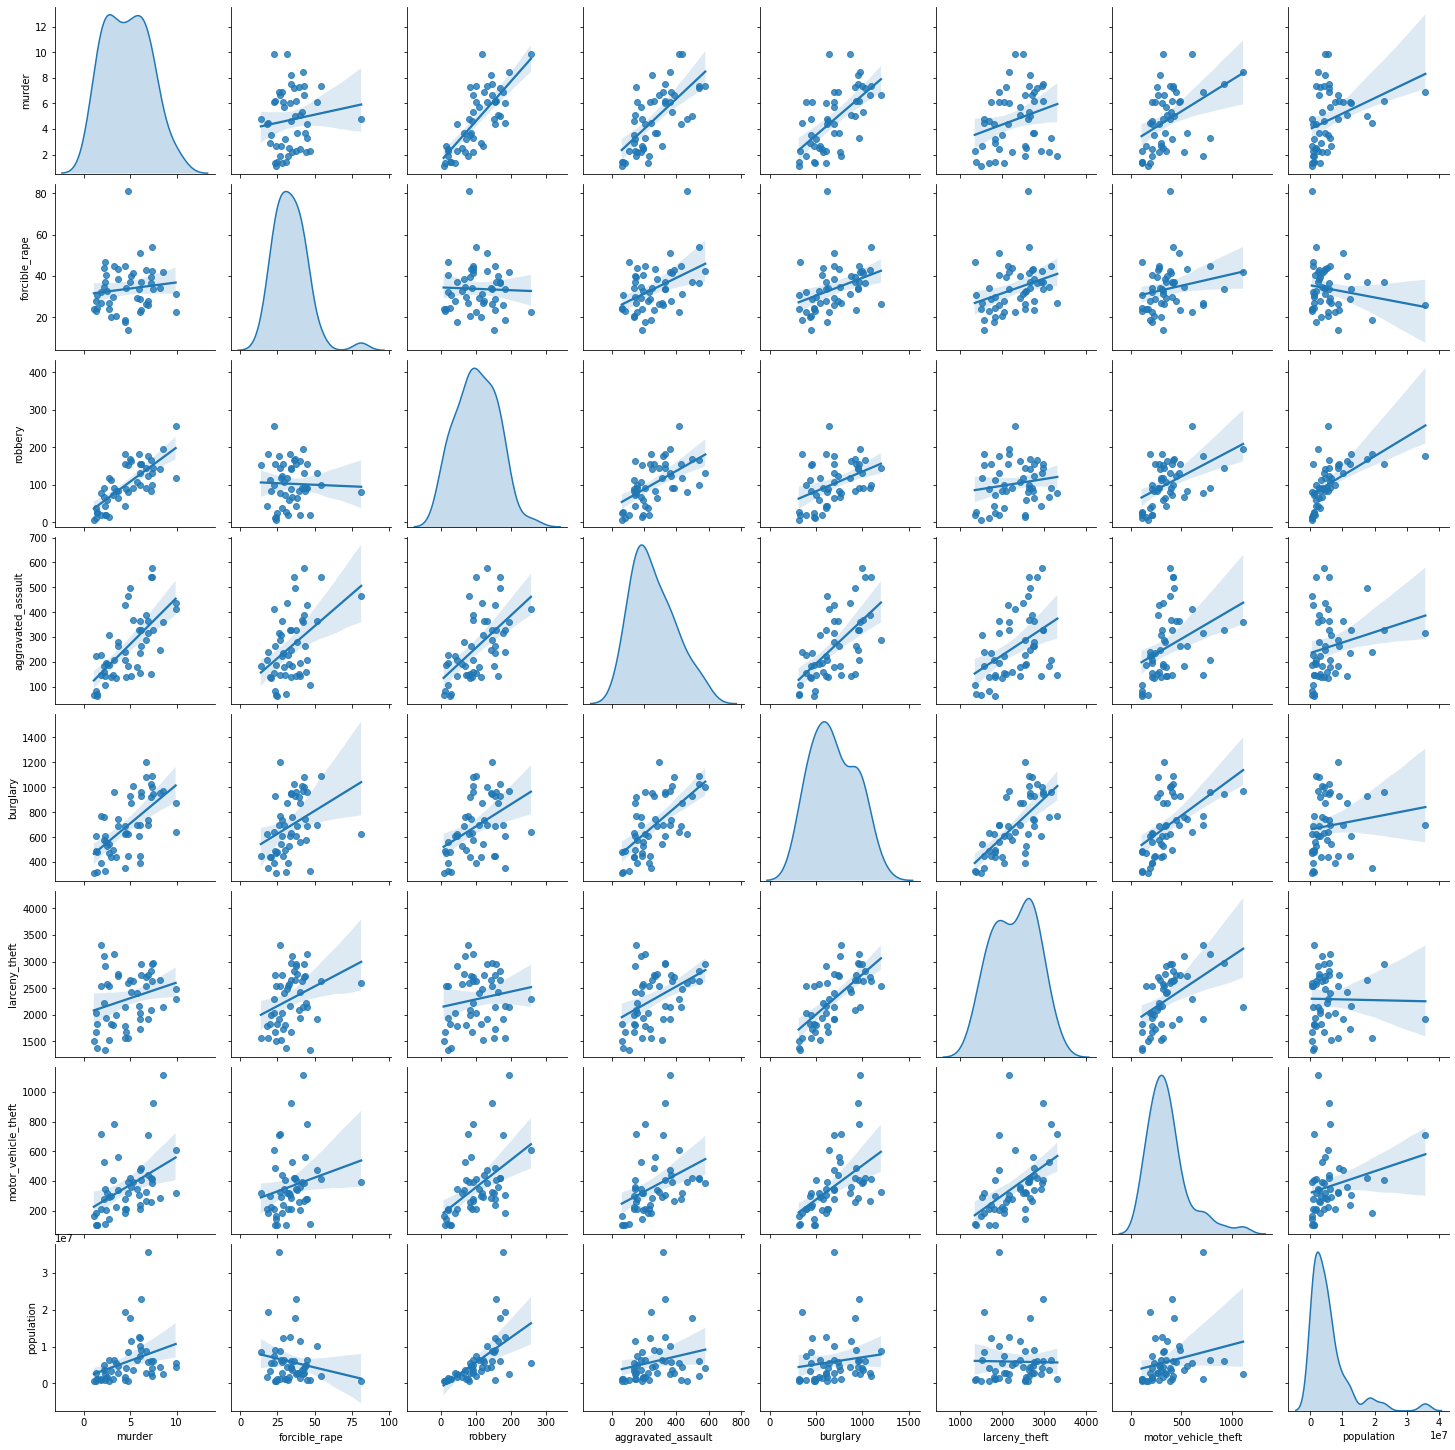

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime = pd.read_csv('./data/crimeRatesByState2005.csv')

crime2 = crime[crime.state != 'United States']
crime2 = crime2[crime.state != 'District of Columbia']

crime2 = crime2.drop({'state'}, axis=1)
q = sns.pairplot(crime2, diag_kind='kde', kind='reg') # 增加REG方法，回归分析，对每个子图表使用。

plt.show()

#### 5.2.3 气泡图

气泡图与散点图相似，不同之处在于，气泡图允许用户在图表中额外加入一个表示大小的变量，*实际上，这就如同以二维方式绘制包含三个变量的图表*。

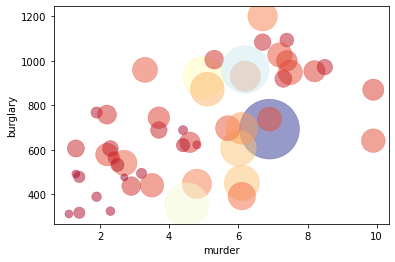

In [18]:
z = list(crime2.population/10000)
colors = np.random.rand(len(list(crime2.murder)))
cm = plt.cm.get_cmap('RdYlBu') # red yellow blue
plt.scatter(
    list(crime2.murder),   # x坐标
    list(crime2.burglary), # y坐标
    s=z,                   # s：size
    c=z,                   # c：color
    cmap=cm, # colormap
    linewidths=0.5,
    alpha=0.5
)
plt.xlabel('murder')
plt.ylabel('burglary')

plt.show()


气泡图其实就是一种特殊的散点图。

此图否定了“人口越多，犯罪率越高”的假设。

### 5.3 数据的分布性

众数、中位数和平均数都是一组数据的代表，但是它们仅仅描述了一组数据的大概分布情况，无法呈现数据的整体面貌。可视化图表则可以克服这个缺点，几乎可以表现所有数据的内容，并且将数据分布的情况一目了然地呈现在读者面前。

#### 5.3.1 茎叶图

aka枝叶图，基本思想是将数组或序列中的变化不大或不变的数作为茎，将变化大的数作为叶排在茎的后面。该图只管且保留原始信息，平均值、中位数和众数均可按照原始数据准确、方便地算出。下面用纯数学方法实现茎叶图的绘制，无第三方可视化库。

In [19]:
import numpy as np
import math
from itertools import groupby
import pandas as pd


birth = pd.read_csv('./data/birthrate.csv')
birth.dropna(subset=['2008'], inplace=True)

dirt = {}
data = list(round(birth['2008'], 1))
rangenum = []

for k,g in groupby(sorted(data), key=lambda x: int(x)):
    lst = map(str, list(map(lambda y: divmod(int(y*10), 10)[1], list(g))))
    dirt[k] = ' '.join(lst)
    rangenum.append(k)

num = list(range(rangenum[0], rangenum[-1], 2))

for i in num:
    a = ''
    for k in sorted(dirt.keys()):
        if 0 <= k-i <= 1:
            a = a + ' ' + dirt[k]
        elif k-i > 1:
            break
    print(str(i).rjust(5), '|', a)



    8 |  2 3 7 1 3 3 4 4 6 8 9 9 9
   10 |  0 1 2 2 3 4 5 5 5 6 6 9 9 9 0 0 1 2 2 2 2 3 4 5 5 5 7 7 7 8 8 9
   12 |  0 0 0 1 1 1 1 1 3 5 6 7 8 9 9 9 3 7 8 9
   14 |  0 0 3 4 5 6 6 7 8 8 9 9 1 2 3 7
   16 |  2 2 7 7 7 9 1 2 3 6 7 7 8 8 9
   18 |  0 0 2 3 3 6 7 7 8 8 8 9 0 0 4 4 8
   20 |  0 0 2 4 4 4 5 6 8 8 9 1 2 4 5 5 6 7 9
   22 |  0 0 5 7 8 3 4 5 7 9
   24 |  1 1 4 5 6 6 7 7 7 7 1 3 4 7
   26 |  3 1 3 3 5 6 6 7
   28 |  0 1 4 9 9 9
   30 |  1 2 4 2 3 4
   32 |  1 4 4 9 0 6 9
   34 |  5 5 6 0 4 9
   36 |  8 8 9 0
   38 |  0 2 3 4 5 5 8 2 3 4 6 8
   40 |  2 3 1 2 5
   42 |  6 9 9
   44 |  1 7
   46 |  2 5 2
   48 | 
   50 | 
   52 |  5


用茎叶图表示数据有两个优点：

1. 统计图上没有原始数据信的损失

2. 茎叶图的数据可以随时记录和增加

但是茎叶图包含的都是数字，不如图表直观、清晰。因此，茎叶图现在已经很少使用。

#### 5.3.2 直方图

直方图的柱形高度表示的是数值频率，柱形的宽度是取值区间。水平轴和垂直轴与一般的柱形图不同，它是连续的。

构建直方图，要先将值的范围分段，然后计算每个间隔中有多少值，这些值通常被指定为连续的、不重叠的变量间隔，间隔必须相邻，并且通常是相等的大小。

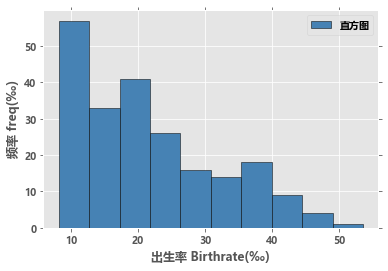

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
titanic = pd.read_csv('./data/birthrate.csv')
titanic.dropna(subset=['2008'], inplace=True) 

plt.style.use('ggplot')
plt.hist(titanic['2008'], bins=10, color='steelblue', edgecolor='k', label='直方图')# k黑色
# bin 方块总个数
# color 方块的颜色
# edgecolor 边框颜色
# label 图例标签
plt.tick_params(top='off', right='off') # 取消边框顶部刻度和右刻度
plt.xlabel('出生率 Birthrate(‰)')
plt.ylabel('频率 freq(‰)')
plt.legend()
plt.show()


此例设置10个分段还是比较合理的。一般地，可以根据数据的特点来决定如何设置分段。若是绝大多数数据都集中在某个区域内，则需要多设置几个分段。只需修改`hist()`中的`bins`参数，就可以实现不同的分段设置。

#### 5.3.3 密度图

密度图相比于直方图可以获知每个柱形的内部变化。曲线一下的总面积等于1，垂直轴表示可能性大小，表示群体中给定的比例值。

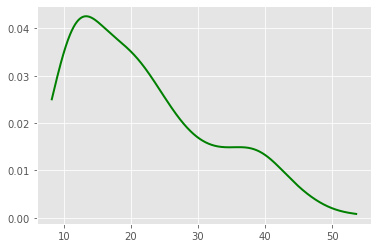

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
titanic = pd.read_csv('./data/birthrate.csv')
titanic.dropna(subset=['2008'], inplace=True)

kde = mlab.GaussianKDE(titanic['2008'])
x2 = np.linspace(titanic['2008'].min(), titanic['2008'].max(), 1000)
line2 = plt.plot(x2, kde(x2), 'g-', linewidth=2)
plt.show()

现在还可以继续深入研究，将直方图和密度图绘制在一起，将`hist()`函数中的`normed`参数设置为True。`normed`参数表示对y轴数据进行标准化，如果为`True`则为本区间所有的点在所有的点中所占的概率。

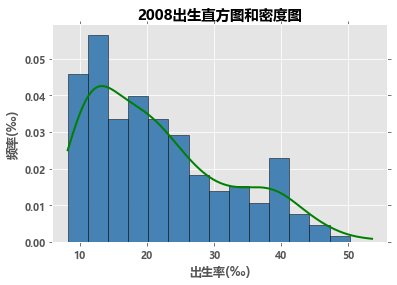

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
titanic = pd.read_csv('./data/birthrate.csv')
titanic.dropna(subset=['2008'], inplace=True)# 滤去缺失数据

plt.style.use('ggplot')
## 绘制直方图
plt.hist(
    titanic['2008'],
    bins=np.arange(
        titanic['2008'].min(),
        titanic['2008'].max(),
        3
    ),
    density=True,
    color='steelblue',
    edgecolor='k'
)
plt.title('2008出生直方图和密度图')
plt.xlabel('出生率(‰)')
plt.ylabel('频率(‰)')

## 绘制kde曲线
kde = mlab.GaussianKDE(titanic['2008'])
x2 = np.linspace(titanic['2008'].min(), titanic['2008'].max(), 1000)
line2 = plt.plot(x2, kde(x2), 'g-', linewidth=2)
plt.tick_params(top='off', right='off')
plt.show()
